In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df = data[['sex', 'age', 'health', 'freetime', 'Dalc', 'Walc', 'traveltime', 'studytime', 'absences', 'G3']]
df['Walc'] = data['Dalc'] + data['Walc']
df.head()

<ipython-input-5-44dc4aa950c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Walc'] = data['Dalc'] + data['Walc']


,sex,age,health,freetime,Dalc,Walc,traveltime,studytime,absences,G3
0,F,18,3,3,1,2,2,2,6,6
1,F,17,3,3,1,2,1,2,4,6
2,F,15,3,3,2,5,1,2,10,10
3,F,15,5,2,1,2,1,3,2,15
4,F,16,5,3,1,3,1,2,4,10


In [ ]:
data.describe()

# Analysis

In [ ]:
df.groupby('sex').agg([np.mean, np.median])

age           health         freetime             Dalc         \
          mean median      mean median      mean median      mean median   
sex                                                                        
F    16.730769   17.0  3.365385    3.0  3.009615    3.0  1.254808    1.0   
M    16.657754   16.0  3.764706    4.0  3.486631    3.0  1.732620    1.0   

         Walc        traveltime        studytime         absences         \
         mean median       mean median      mean median      mean median   
sex                                                                        
F    3.211538    3.0   1.408654    1.0  2.278846    2.0  6.216346    4.0   
M    4.395722    4.0   1.491979    1.0  1.764706    2.0  5.144385    4.0   

            G3         
          mean median  
sex                    
F     9.966346   10.0  
M    10.914439   11.0

# Visualization

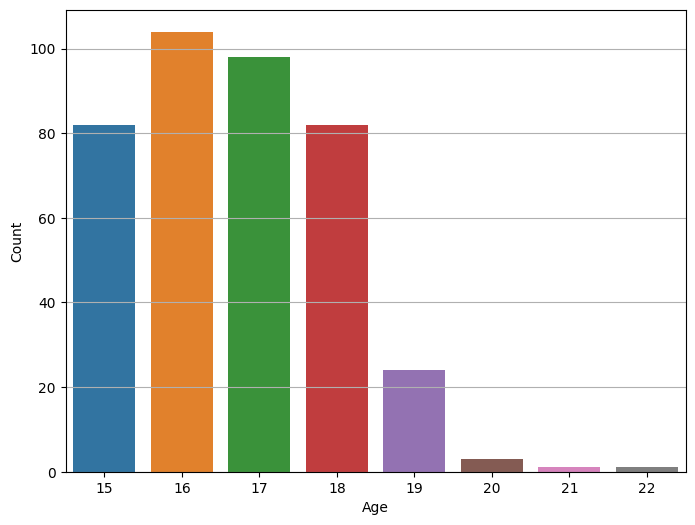

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'age', data = df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

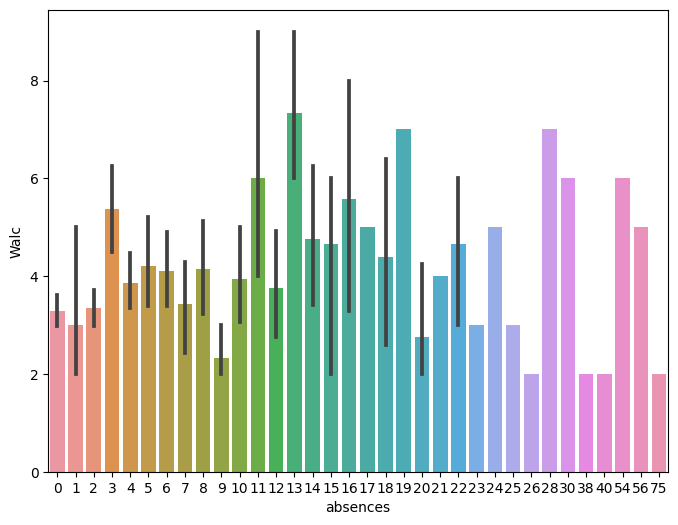

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data = df, x = df['absences'], y = df['Walc'])
plt.show()

<Axes: xlabel='Walc', ylabel='absences'>

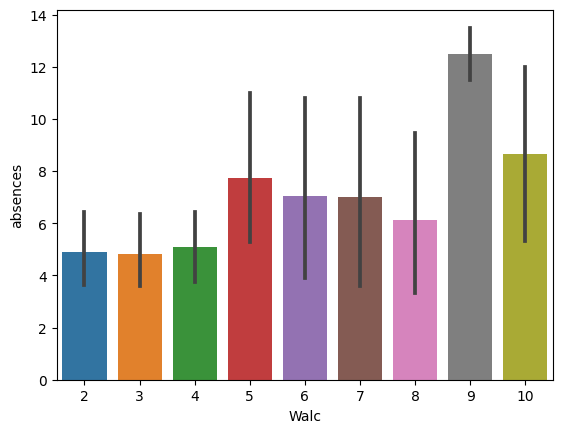

In [ ]:
sns.barplot(data = df, x = df['Walc'], y = df['absences'])

# Box plots

<Axes: xlabel='sex', ylabel='Walc'>

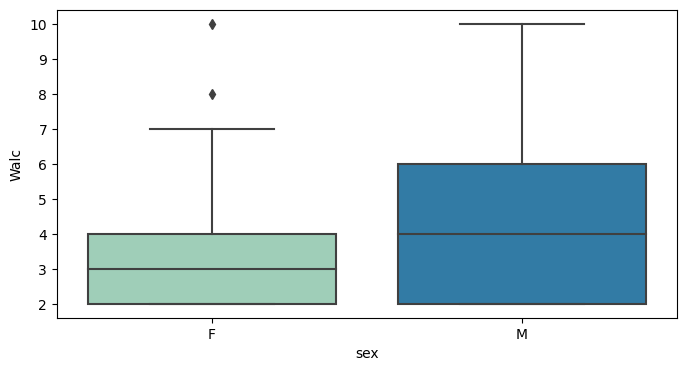

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sex',y='Walc',data=df ,palette='YlGnBu')

<Axes: xlabel='studytime', ylabel='Walc'>

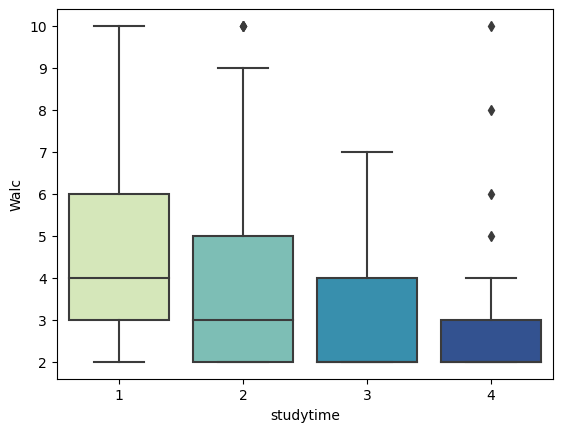

In [ ]:
sns.boxplot(x='studytime',y='Walc',data=df ,palette='YlGnBu')

<Axes: xlabel='traveltime', ylabel='Walc'>

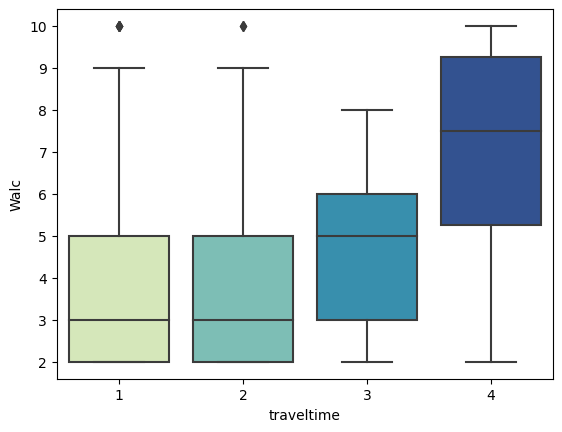

In [ ]:
sns.boxplot(x = 'traveltime', y = 'Walc', data = df, palette = 'YlGnBu')

# Distributions

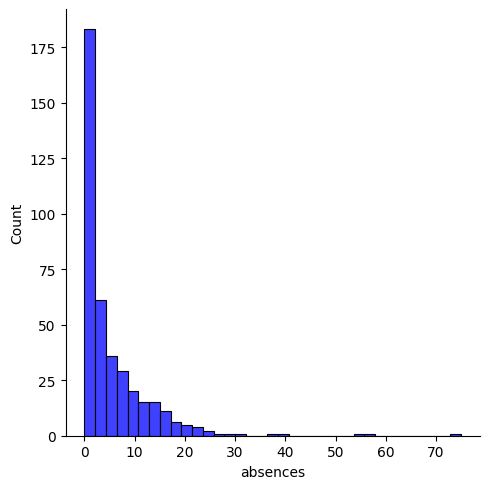

In [ ]:
sns.displot(df['absences'], color = 'b')

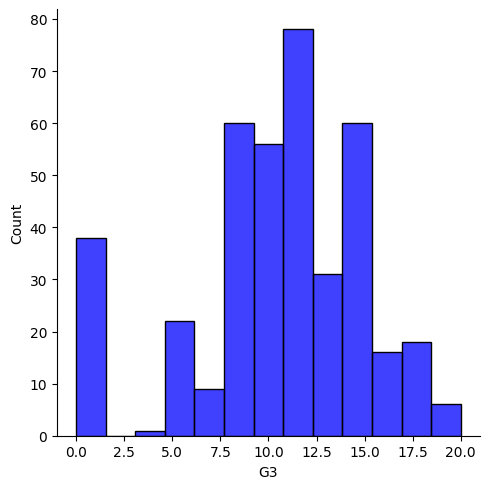

In [ ]:
sns.displot(data['G3'], color = 'b')

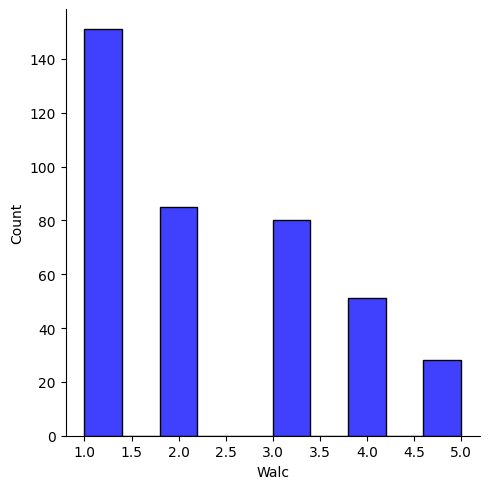

In [ ]:
sns.displot(data['Walc'], color = 'b')

# Correlations

<Axes: xlabel='Walc', ylabel='absences'>

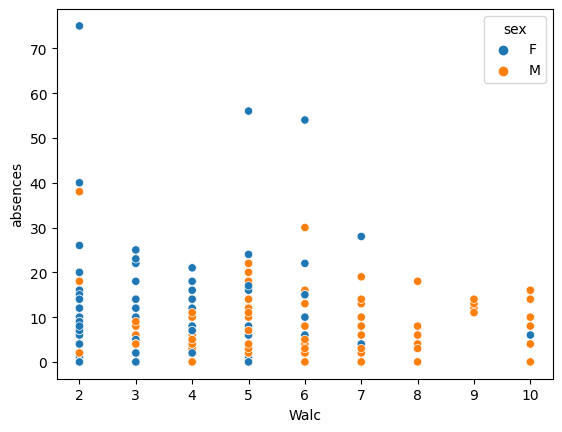

In [ ]:
sns.scatterplot(x = 'Walc', y = 'absences', hue = 'sex', data = df)

<Axes: xlabel='Walc', ylabel='G3'>

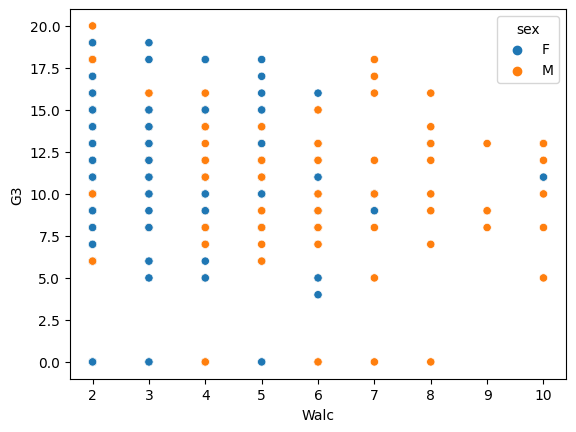

In [ ]:
sns.scatterplot(x = 'Walc', y = 'G3', hue = 'sex', data = df)

<Axes: >

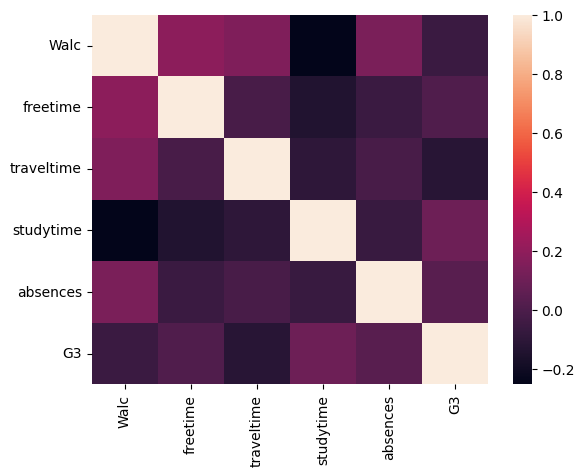

In [ ]:
dataframe = df[['Walc', 'freetime', 'traveltime', 'studytime', 'absences', 'G3']]
sns.heatmap(dataframe.corr())

<Axes: ylabel='Frequency'>

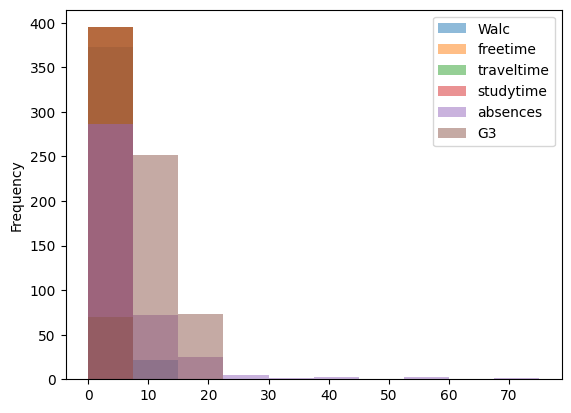

In [ ]:
#TODO change dataframe
# можно взять второстепенные фичи из начального датасета и посмотреть распределение
axis = dataframe.plot.hist(alpha = 0.5)
axis

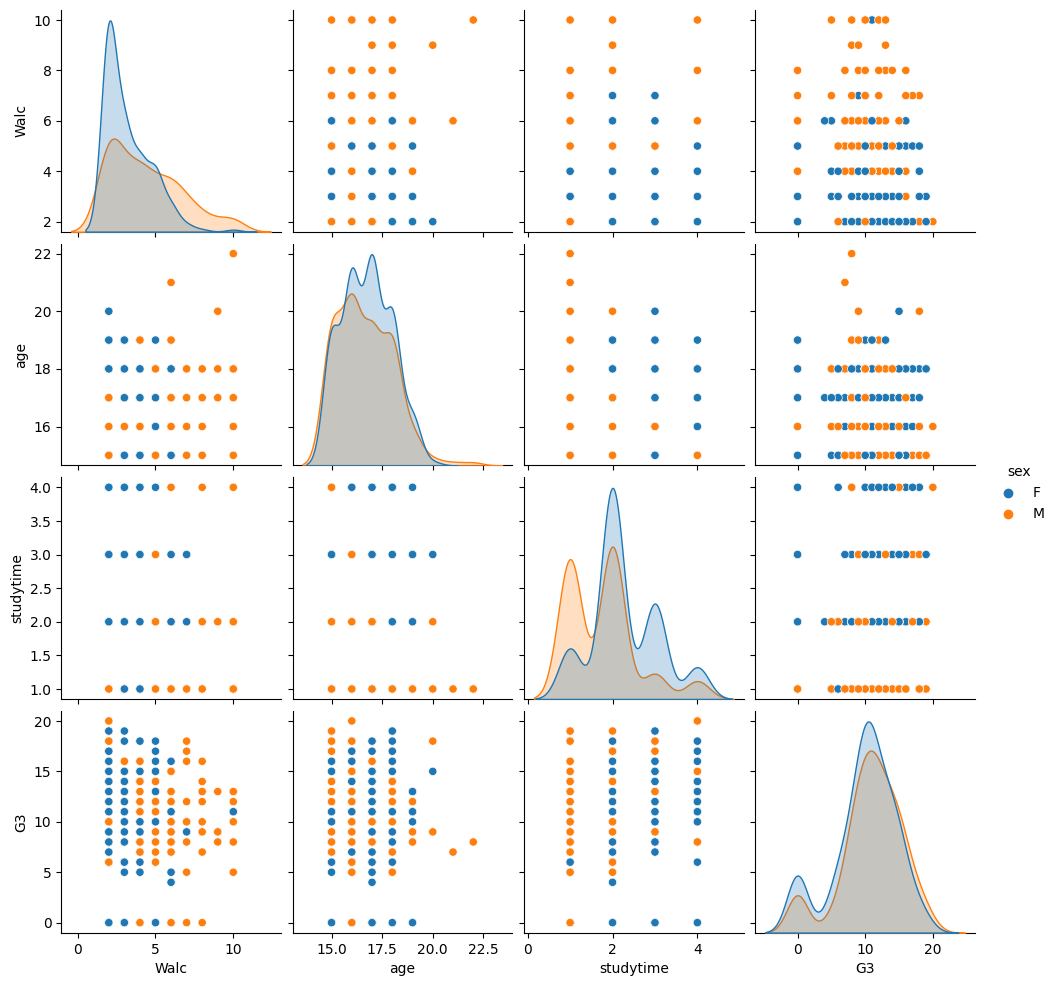

In [ ]:
df1 = df[['Walc', 'age', 'studytime', 'G3', 'sex']]
sns.pairplot(df1, hue = 'sex')

In [ ]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))